# <font color = green> Data analisys from data set Alura films <font>

## Importing data set and lybraries

In [1]:
import pandas as pd
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv('filmes.csv', sep = ',')

In [3]:
dados.dtypes

Id_Title           int64
Series_Title      object
Gross             object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
Noofvotes          int64
dtype: object

## Remaning columns with significant names and removing erros from Total_budget and Run_time

In [4]:
dados.columns

Index(['Id_Title', 'Series_Title', 'Gross', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'Noofvotes'],
      dtype='object')

In [5]:
renomear = {
    'Id_Title' : 'ID',
    'Series_Title' : 'Movie_Title',
    'Gross' : 'Total_Budget',
    'Released_Year' : 'Release_Year',
    'Certificate' : 'Rating',
    'Runtime' : 'Run_Time',
    'Genre' : 'Genre',
    'IMDB_Rating' : 'IMDB_Rating',
    'Overview' : 'Overview',
    'Meta_score' : 'Score',
    'Director' : 'Director',
    'Star1' : 'Actor_1',
    'Star2' : 'Actor_2',
    'Star3' : 'Actor_3',
    'Star4' : 'Actor_4',
    'Noofvotes' : 'Number_of_votes'
}

In [6]:
dados = dados.rename(columns = renomear)
dados['Run_Time'] = dados['Run_Time'].str.removesuffix(" min").astype(int)
dados['Total_Budget'] = dados['Total_Budget'].str.replace(',' , '', regex = False).astype(float)
dados.head(3)

,ID,Movie_Title,Total_Budget,Release_Year,Rating,Run_Time,Genre,IMDB_Rating,Overview,Score,Director,Actor_1,Actor_2,Actor_3,Actor_4,Number_of_votes
0,1,The Shawshank Redemption,28341469.0,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,2,The Godfather,134966411.0,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,3,The Dark Knight,534858444.0,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   Movie_Title      1000 non-null   object 
 2   Total_Budget     989 non-null    float64
 3   Release_Year     1000 non-null   int64  
 4   Rating           1000 non-null   object 
 5   Run_Time         1000 non-null   int32  
 6   Genre            1000 non-null   object 
 7   IMDB_Rating      1000 non-null   float64
 8   Overview         1000 non-null   object 
 9   Score            843 non-null    float64
 10  Director         1000 non-null   object 
 11  Actor_1          1000 non-null   object 
 12  Actor_2          1000 non-null   object 
 13  Actor_3          1000 non-null   object 
 14  Actor_4          1000 non-null   object 
 15  Number_of_votes  1000 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 12

The Genre column contains more than one movie genre listed and will be diveded in three

In [8]:
dados[['Genre_1', 'Genre_2', 'Genre_3']] = dados['Genre'].str.split(expand=True)
dados.drop(labels = 'Genre', axis = 1, inplace = True)
dados.head(3)

,ID,Movie_Title,Total_Budget,Release_Year,Rating,Run_Time,IMDB_Rating,Overview,Score,Director,Actor_1,Actor_2,Actor_3,Actor_4,Number_of_votes,Genre_1,Genre_2,Genre_3
0,1,The Shawshank Redemption,28341469.0,1994,A,142,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,Drama,None,None
1,2,The Godfather,134966411.0,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"Crime,",Drama,None
2,3,The Dark Knight,534858444.0,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"Action,","Crime,",Drama


Splitting the Genre column caused some erros like spaces and commas

In [9]:
dados.Genre_1 = dados.Genre_1.str.strip().str.replace(',', '')
dados.Genre_2 = dados.Genre_2.str.strip().str.replace(',', '')
dados.Genre_3 = dados.Genre_3.str.strip().str.replace(',', '')
dados.head(3)

,ID,Movie_Title,Total_Budget,Release_Year,Rating,Run_Time,IMDB_Rating,Overview,Score,Director,Actor_1,Actor_2,Actor_3,Actor_4,Number_of_votes,Genre_1,Genre_2,Genre_3
0,1,The Shawshank Redemption,28341469.0,1994,A,142,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,Drama,None,None
1,2,The Godfather,134966411.0,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,Crime,Drama,None
2,3,The Dark Knight,534858444.0,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,Action,Crime,Drama


## The Rating column uses rating from different places and was standardized

In [10]:
dados.Rating.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', '16', 'PG', 'G', 'Passed', 'TV-14',
       '10', '12', '14', 'TV-MA', 'Unrated', 'GP', '18', 'Not Rated',
       'Approved', 'not rated', 'Livre', 'TV-PG', '12A', 'PG-12',
       'Not rated', 'U/A'], dtype=object)

In [11]:
ratings = {
    'A' : 'General Audiences', 'UA' : 'Parental guidance suggested', 'U' : 'General Audiences',
    'PG-13' : '13 or more', 'R' : '17 or more', '16' : '16 or more', 'PG' : 'Parental guidance suggested',
    'G' : 'General Audiences','Passed' : 'Aprovado', 'TV-14' : '14 or more','10' : '10 or more',
    '12' : '12 or more', '14' : '14 or more', 'TV-MA' : '17 or more', 'Unrated' : 'Not rated',
    'GP' : 'General Audiences', '18' : '18 or more', 'Not Rated' : 'Not rated', 'Approved' : 'Aproved',
    'not rated' : 'Not rated', 'Livre' : 'General Audiences', 'TV-PG' : 'Parental guidance suggested',
    '12A' : '12 or more', 'PG-12' : '12 or more', 'Not rated' : 'Not rated', 'U/A' : 'Parental guidance suggested'
}

In [12]:
dados.Rating = dados.Rating.map(ratings)
dados.head(3)

,ID,Movie_Title,Total_Budget,Release_Year,Rating,Run_Time,IMDB_Rating,Overview,Score,Director,Actor_1,Actor_2,Actor_3,Actor_4,Number_of_votes,Genre_1,Genre_2,Genre_3
0,1,The Shawshank Redemption,28341469.0,1994,General Audiences,142,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,Drama,None,None
1,2,The Godfather,134966411.0,1972,General Audiences,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,Crime,Drama,None
2,3,The Dark Knight,534858444.0,2008,Parental guidance suggested,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,Action,Crime,Drama


In [13]:
dados.to_csv('dados.csv', sep = ',', index = False)

# <font color = green> The following topics will be analyzed <font>
* Artists that apears the most 
* Averange money spent per movie
* Money spent per genre  
* Most common genres
* Votes per genre  
* Top IMBD score movie
* Top voted movie
* Director that spent more and less  
* Top voted director 


## The 10 artists that apears the most

In [14]:
tab_1 = pd.DataFrame(dados.Actor_1.value_counts())
tab_1.columns.name = 'Name'
tab_2 = pd.DataFrame(dados.Actor_2.value_counts())
tab_2.columns.name = 'Name'
tab_3 = pd.DataFrame(dados.Actor_3.value_counts())
tab_3.columns.name = 'Name'
tab_4 = pd.DataFrame(dados.Actor_4.value_counts())
tab_4.columns.name = 'Name'
concat = pd.concat([tab_1, tab_2, tab_3, tab_4], axis = 0)
concat.fillna({'Actor_1' : 0, 'Actor_2' : 0, 'Actor_3' : 0, 'Actor_4' : 0}, inplace = True)
concat['Total'] = concat.Actor_1 + concat.Actor_2 + concat.Actor_3 + concat.Actor_4
concat

Name,Actor_1,Actor_2,Actor_3,Actor_4,Total
Tom Hanks,12.0,0.0,0.0,0.0,12.0
Robert De Niro,11.0,0.0,0.0,0.0,11.0
Al Pacino,10.0,0.0,0.0,0.0,10.0
Clint Eastwood,10.0,0.0,0.0,0.0,10.0
Humphrey Bogart,9.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...
Paul Rudd,0.0,0.0,0.0,1.0,1.0
Derek Jacobi,0.0,0.0,0.0,1.0,1.0
Ed Skrein,0.0,0.0,0.0,1.0,1.0
Merila Zare'i,0.0,0.0,0.0,1.0,1.0


In [15]:
top_10 = pd.DataFrame(concat.Total.nlargest(n=10))
top_10.columns.name = 'Name'
top_10

Name,Total
Tom Hanks,12.0
Robert De Niro,11.0
Al Pacino,10.0
Clint Eastwood,10.0
Humphrey Bogart,9.0
Leonardo DiCaprio,9.0
Johnny Depp,8.0
Christian Bale,8.0
James Stewart,8.0
Denzel Washington,7.0


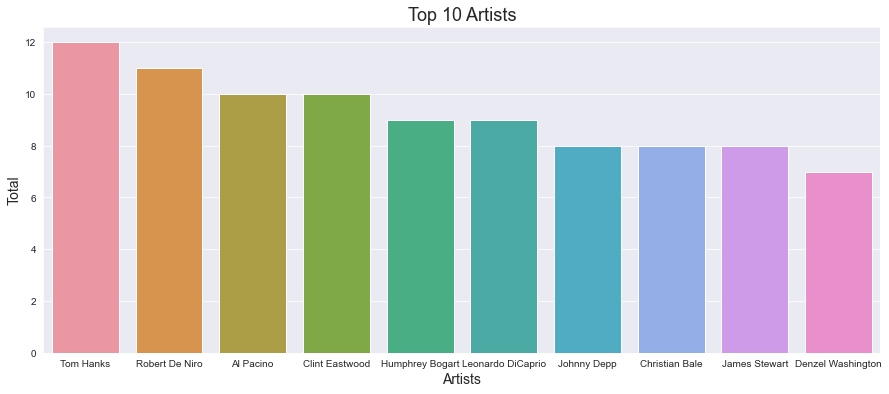

In [16]:
title = 'Top 10 Artists'
labelx = 'Artists'
labely = 'Total'
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x=top_10.index, y=top_10.Total)
ax.figure.set_size_inches(15,6)
ax.set_title(title, loc = 'center', fontsize = 18)
ax.set_xlabel(labelx, fontsize = 14)
ax.set_ylabel(labely, fontsize = 14)
ax=ax

## The averange budget of movies

In [17]:
budget = dados.dropna()
print(f'The averange budget per movie is: {(budget.Total_Budget.mean()):.2f}')

The averange budget per movie is: 78245635.30


## The total budget for each genre

In [18]:
tab_1 = pd.DataFrame(budget.groupby('Genre_1')['Total_Budget'].sum())
tab_1.columns.name = 'Genre'
tab_2 = pd.DataFrame(budget.groupby('Genre_2')['Total_Budget'].sum())
tab_2.columns.name = 'Genre'
tab_3 = pd.DataFrame(budget.groupby('Genre_3')['Total_Budget'].sum())
tab_3.columns.name = 'Genre'
genre_budget = pd.concat([tab_1, tab_2, tab_3], axis = 1)
genre_budget.columns = ['Total_Budget_1', 'Total_Budget_2', 'Total_Budget_3']
genre_budget.fillna({'Total_Budget_1' : 0, 'Total_Budget_2' : 0, 'Total_Budget_3' : 0}, inplace = True)
genre_budget['Total'] = genre_budget.Total_Budget_1 + genre_budget.Total_Budget_2 + genre_budget.Total_Budget_3
genre_budget

,Total_Budget_1,Total_Budget_2,Total_Budget_3,Total
Action,1.796485e+10,2.010362e+09,0.000000e+00,1.997522e+10
Adventure,4.213090e+09,1.991696e+10,2.008695e+09,2.613875e+10
Animation,8.827148e+09,0.000000e+00,0.000000e+00,8.827148e+09
Biography,4.198667e+09,5.665855e+08,0.000000e+00,4.765253e+09
Comedy,1.883961e+09,1.709140e+09,6.576852e+09,1.016995e+10
Crime,2.282382e+09,3.116192e+09,6.098041e+08,6.008378e+09
Drama,2.976746e+09,9.313349e+09,6.584270e+09,1.887436e+10
Family,4.000000e+06,1.977413e+09,1.628782e+09,3.610195e+09
Film-Noir,4.491910e+05,1.809400e+07,7.958516e+06,2.650171e+07
Horror,3.743466e+08,7.810092e+07,5.100000e+06,4.575475e+08


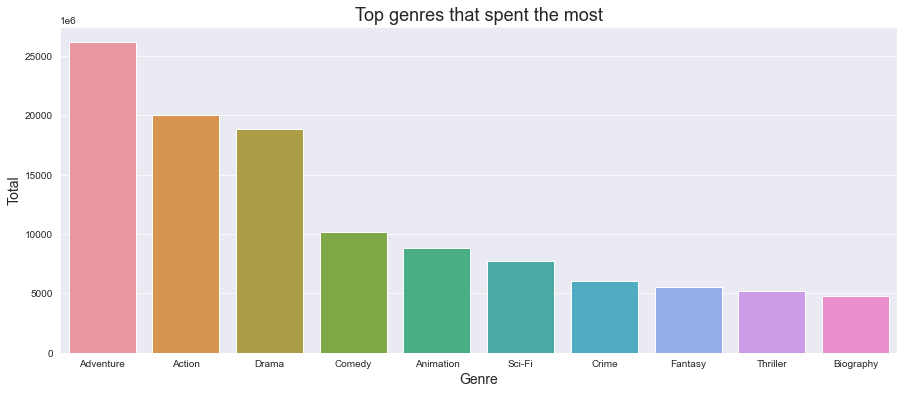

In [19]:
temp = pd.DataFrame(genre_budget.Total.nlargest(n=10))
title = 'Top genres that spent the most'
labelx = 'Genre'
labely = 'Total'
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.ticklabel_format(style='scientific', axis='y', scilimits = [6,6])
ax = sns.barplot(x=temp.index, y=temp.Total)
ax.figure.set_size_inches(15,6)
ax.set_title(title, loc = 'center', fontsize = 18)
ax.set_xlabel(labelx, fontsize = 14)
ax.set_ylabel(labely, fontsize = 14)
ax=ax

## The genres that apears the most

In [20]:
tab_1 = pd.DataFrame(dados.Genre_1.value_counts())
tab_1.columns.name = 'Genre'
tab_2 = pd.DataFrame(dados.Genre_2.value_counts())
tab_2.columns.name = 'Genre'
tab_3 = pd.DataFrame(dados.Genre_3.value_counts())
tab_3.columns.name = 'Genre'
top_genre = pd.concat([tab_1, tab_2, tab_3], axis = 1)
top_genre.fillna({'Genre_1' : 0, 'Genre_2' : 0, 'Genre_3' : 0}, inplace = True)
top_genre['Total'] = top_genre.Genre_1 + top_genre.Genre_2 + top_genre.Genre_3
top_genre.head(3)

Genre,Genre_1,Genre_2,Genre_3,Total
Drama,289.0,320.0,115.0,724.0
Action,172.0,17.0,0.0,189.0
Comedy,155.0,43.0,35.0,233.0


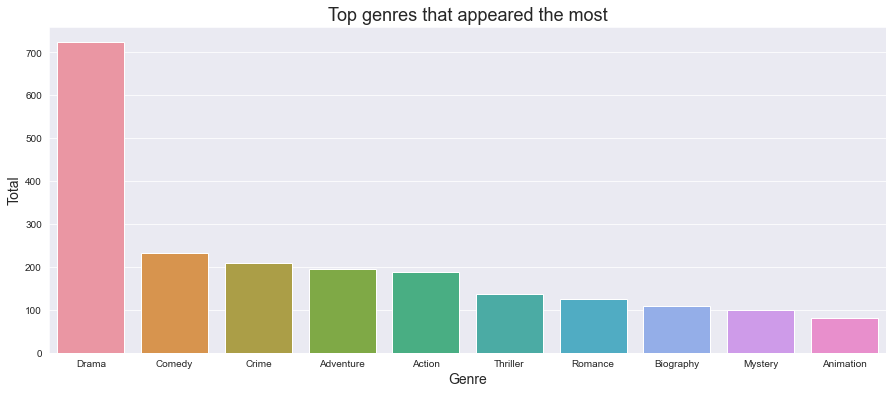

In [22]:
temp = pd.DataFrame(top_genre.Total.nlargest(n=10))
title = 'Top genres that appeared the most'
labelx = 'Genre'
labely = 'Total'
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(x=temp.index, y=temp.Total)
ax.figure.set_size_inches(15,6)
ax.set_title(title, loc = 'center', fontsize = 18)
ax.set_xlabel(labelx, fontsize = 14)
ax.set_ylabel(labely, fontsize = 14)
ax=ax

## Genre with most votes

In [ ]:
tab_1 = pd.DataFrame(dados.groupby('Genre_1')['Number_of_votes'].sum())
tab_1.columns.name = 'Genre'
tab_2 = pd.DataFrame(dados.groupby('Genre_2')['Number_of_votes'].sum())
tab_2.columns.name = 'Genre'
tab_3 = pd.DataFrame(dados.groupby('Genre_3')['Number_of_votes'].sum())
tab_3.columns.name = 'Genre'
genre_votes = pd.concat([tab_1, tab_2, tab_3], axis = 1)
genre_votes.columns = ['G1', 'G2', 'G3']
genre_votes.fillna({'G1' : 0, 'G2' : 0, 'G3' : 0}, inplace = True)
genre_votes['Total'] = genre_votes.G1 + genre_votes.G2 + genre_votes.G3
genre_votes.head(3)

In [ ]:
temp = pd.DataFrame(genre_votes.Total.nlargest(n=10))
title = 'Genres with most votes'
labelx = 'Genre'
labely = 'Total'
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.ticklabel_format(style='scientific', axis='y', scilimits = [6,6])
ax = sns.barplot(x=temp.index, y=temp.Total)
ax.figure.set_size_inches(15,6)
ax.set_title(title, loc = 'center', fontsize = 18)
ax.set_xlabel(labelx, fontsize = 14)
ax.set_ylabel(labely, fontsize = 14)
ax=ax

## The movie with the highest IMDB score is

In [ ]:
name = dados[dados.IMDB_Rating == dados.IMDB_Rating.max()].Movie_Title
print(f'The highest IMDB rated movie is: {name[0]}')

## The director who spent most and less

In [ ]:
tab = pd.DataFrame(budget.groupby('Director')['Total_Budget'].sum())
tab.head(3)

In [ ]:
print(f'The director who spent most is {tab.max()[0]} and the director who spent less is {tab.min()[0]}')

In [ ]:

tab_1 = pd.DataFrame(dados.Actor_1.value_counts())
tab_1.columns.name = 'Name'
tab_2 = pd.DataFrame(dados.Actor_2.value_counts())
tab_2.columns.name = 'Name'
tab_3 = pd.DataFrame(dados.Actor_3.value_counts())
tab_3.columns.name = 'Name'
concat = pd.concat([tab_1, tab_2, tab_3], axis = 0)
concat.fillna({'Actor_1' : 0, 'Actor_2' : 0, 'Actor_3' : 0}, inplace = True)
concat['Total'] = concat.Actor_1 + concat.Actor_2 + concat.Actor_3
top_10 = pd.DataFrame(concat.Total.nlargest(n=10))
top_10.columns.name = 'Name'
sns.barplot(x=top_10.index, y=top_10.Total)
